# Instanciate the Candidate Database

In [1]:
import networkx
import polars as pl
%env NX_CURGAPH_AUTOCONFIG=True
import networkx as nx
import candidate_dataset

DATA_PATH = "./data/"
METADATA_PATH = "./metadata/"

dataset = candidate_dataset.CandidateDataset(
    source_train=DATA_PATH + "train.csv",
    source_test=DATA_PATH + "test.csv",
    source_feature_data=METADATA_PATH + "feature_metadata_refined.json",
)

dataset.build_pipeline(limit=None, fill_missing=True, encode_categorical=True, normalize_cols=True)
dataset.build_candidate_id_set()
dataset.df_train.sort(by="ID").select(sorted(dataset.df_train.columns))

env: NX_CURGAPH_AUTOCONFIG=True
Successfully instanciated Candidate Dataset and imported feature metadata.
Imported train dataset with 272819 entries (0 of which have missing features)
Imported test dataset with 48416 entries (0 of which have missing features)


ID,feature_001:1,feature_001:2,feature_001:3,feature_001:4,feature_001:5,feature_001:missing,feature_002,feature_002:missing,feature_003,feature_003:missing,feature_004,feature_004:missing,feature_005,feature_005:missing,feature_006,feature_006:missing,feature_007,feature_007:missing,feature_008,feature_008:missing,feature_009,feature_009:missing,feature_010,feature_010:missing,feature_011,feature_011:missing,feature_012:0,feature_012:1,feature_012:2,feature_012:3,feature_012:missing,feature_013,feature_013:missing,feature_014,feature_014:missing,feature_015,feature_016,feature_017,feature_017:missing,feature_018,feature_018:missing,high_conf_clean,is_cheating
u64,bool,bool,bool,bool,bool,bool,f32,bool,f32,bool,f32,bool,f32,bool,f32,bool,bool,bool,f32,bool,f32,bool,f32,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,f32,f32,f32,bool,f32,bool,bool,bool
111395511279975,false,true,false,false,false,false,-0.689304,false,-0.24793,false,0.794861,false,-1.211313,false,-1.122221,false,true,false,1.611479,false,1.935853,false,-0.001359,false,false,false,true,false,false,false,false,true,false,true,false,-0.346371,-0.31759,1.369481,false,-0.122767,false,true,false
149515486601323,false,true,false,false,false,false,-0.32229,false,0.553972,false,-1.096135,false,-0.844825,false,-0.462723,false,true,false,1.361651,false,1.681633,false,-0.009491,false,false,false,true,false,false,false,false,false,false,true,false,-0.348328,-0.432933,-1.716514,true,1.101163,false,true,false
160906985161287,false,false,false,false,true,false,1.145764,false,0.954923,false,-1.096135,false,1.354103,false,0.856274,false,true,false,1.361651,false,1.681633,false,-0.000379,false,false,false,true,false,false,false,false,true,false,true,false,-0.34186,-0.370937,-0.920808,false,-0.454953,false,false,false
372923524293330,false,false,false,false,false,true,-1.056318,true,-1.851734,true,-0.285708,false,0.621127,false,0.856274,false,true,false,1.611479,false,1.681633,false,0.000249,false,false,false,true,false,false,false,false,true,false,true,false,-0.348249,-0.405499,-1.545096,false,0.485668,false,true,false
396236678209396,false,false,false,true,false,false,0.411737,false,0.954923,false,0.794861,false,0.254639,false,0.196776,false,true,false,1.361651,false,-0.606347,false,-0.007269,false,false,false,true,false,false,false,false,true,false,true,false,-0.342394,-0.370937,0.413475,false,0.847724,false,true,false
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
18446539283039586544,true,false,false,false,false,false,1.512778,false,0.553972,false,0.524719,false,-0.844825,false,0.856274,false,true,false,1.611479,false,1.681633,false,-0.001608,false,false,false,true,false,false,false,false,true,false,true,false,-0.315587,-0.348171,-1.285127,false,0.586319,false,true,false
18446564111536718883,false,true,false,false,false,false,1.512778,false,-0.648881,false,1.065004,false,0.987615,false,0.856274,false,true,false,-0.886794,false,-0.606347,false,-0.010341,false,false,false,false,false,false,true,false,true,false,true,false,-0.34837,-0.405499,-0.062558,false,-1.071172,false,false,false
18446710016529126028,false,false,false,false,true,false,1.512778,false,-1.049832,false,1.065004,false,0.621127,false,-1.45197,false,true,false,-0.636967,false,-0.606347,false,-0.008471,false,false,false,false,false,true,false,false,false,false,false,false,-0.341794,-0.405499,-1.401475,false,-0.137792,false,false,false


In [40]:
dataset.df_train.select("is_cheating").sum() / len(dataset.df_train)

is_cheating
f64
0.1262


In [4]:
df_train, df_test = dataset.split()

params0 = {
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "max_depth": 8,
    "learning_rate": 0.1,
    "n_estimators": 100,
}

params = {
    "objective": "binary:logistic",
    "tree_method": "hist",
    "booster": "gbtree",
    "eval_metric": "auc",
    "n_estimators": 20,
    "max_depth": 8,
    "subsample": 0.5,
    "colsample_bytree": 1.0,
    "colsample_bylevel": 1.0,
    "colsample_bynode": 1.0,
    "verbosity": 2,
    "device": "cpu",
    "enable_categorical": False,
    "n_jobs": 4,
}

xgb = dataset.fit_xgboost_model(dataset.df_train, params=params)

dataset.evaluate_xgboost_model(xgb, dataset.df_train)

Split dataframe into 218255 training and 54564 validation entries.


/home/matthias/.local/share/mamba/envs/work/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [23:01:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1764168035494/work/src/learner.cc:790: 
Parameters: { "enable_categorical", "n_estimators" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost model trained successfully!
Evaluation metrics -> [0]	eval-auc:0.94908373889917863, Accuracy: 0.9219


{'logloss': None,
 'accuracy': 0.9218786081614551,
 'raw_eval': '[0]\teval-auc:0.94908373889917863'}

# Instanciate the Network

In [3]:
import social_graph

nodes_subset = set(dataset.df_train["ID"].to_list()).union(set(dataset.df_test["ID"].to_list()))

network = social_graph.SocialGraph(source_file=DATA_PATH + "social_graph.csv")
network.build(limit=None, database_nodes_subset=None)

Graph loaded successfully
Number of nodes: 1727366
Number of edges: 1709794
Successfully built & validated social graph with 1727366 nodes.


In [8]:
import cugraph
H = network.get_subgraph_view(0)
print(f"Subgraph has {H.number_of_edges()} edges and {H.number_of_nodes()} nodes")
components_shortest_paths = nx.all_pairs_shortest_path_length(H, backend="cugraph")

Subgraph has 1335780 edges and 1335750 nodes


In [17]:
type(components_shortest_paths)

generator

In [ ]:
community_idx = 150
subgraph = network.get_subgraph_view(community_idx)
adjacency, laplacian = network.get_graph_relationship_matrices(subgraph=subgraph)
adjacency
# embeddings = network.get_spectral_embeddings(subgraph=subgraph, n_components=4)

<Compressed Sparse Row sparse array of dtype 'float64'
	with 448 stored elements and shape (225, 225)>

In [5]:
embeddings = network.get_spectral_embeddings(subgraph=subgraph, n_components=3)

min_coords = embeddings.min(axis=0)
max_coords = embeddings.max(axis=0)
range_coords = max_coords - min_coords

# Normalize to [0, 1]
range_coords[range_coords == 0] = 1.0
embeddings = (embeddings - min_coords) / range_coords

In [9]:
dataset.df_train.filter(pl.col("ID") == 5956214523393149507)["feature_005"].item()

-0.8448251485824585

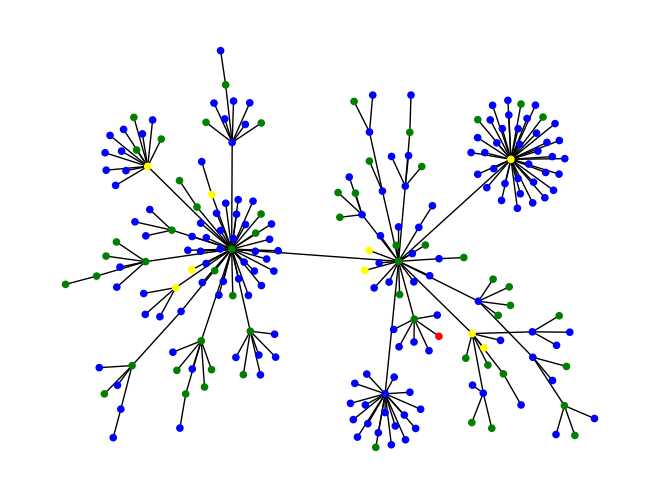

In [6]:
network.plot_subgraph_view_by_datasets(community_idx=150, dataset_train=dataset.df_train, dataset_test=dataset.df_test)

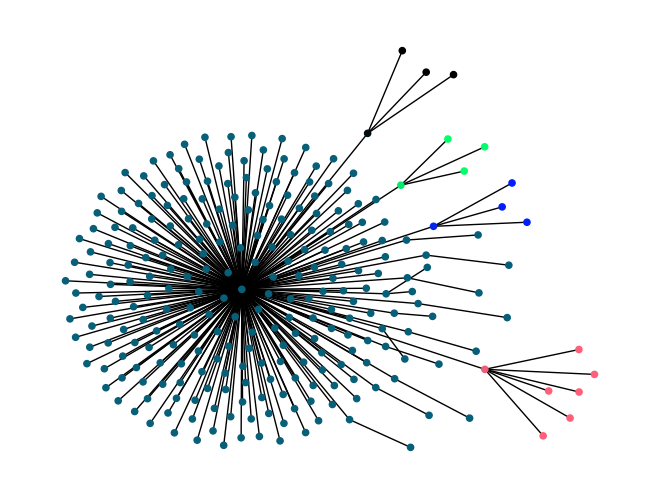

In [ ]:
network.plot_subgraph_view_by_network(community_idx=124)

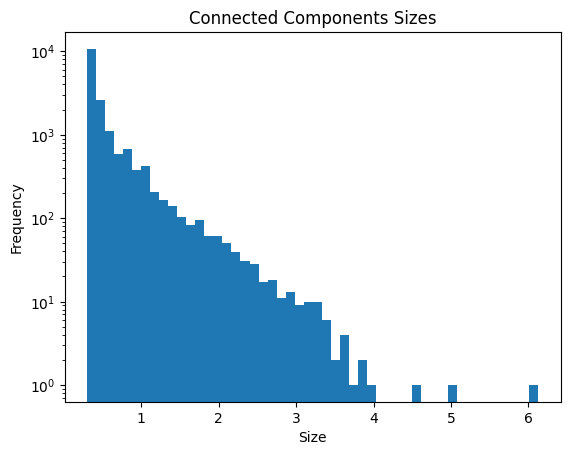

In [21]:
connected_components_sizes = [len(c) for c in network.communities]
import numpy as np
import matplotlib.pyplot as plt

plt.hist(np.log10(np.array(connected_components_sizes)), bins=50, log=True)
plt.title("Connected Components Sizes")
plt.xlabel("Size [log 10]")
plt.ylabel("Frequency")
plt.show()

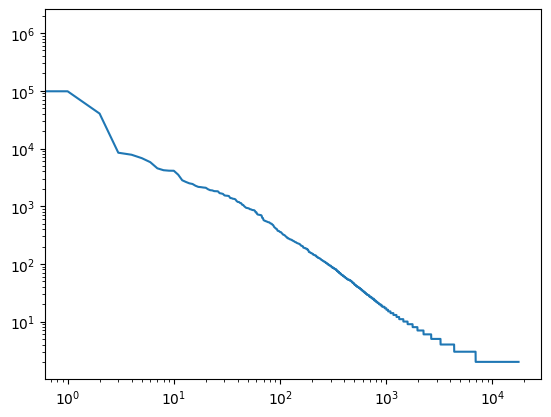

In [25]:
plt.loglog(connected_components_sizes)

Subgraph of size 355


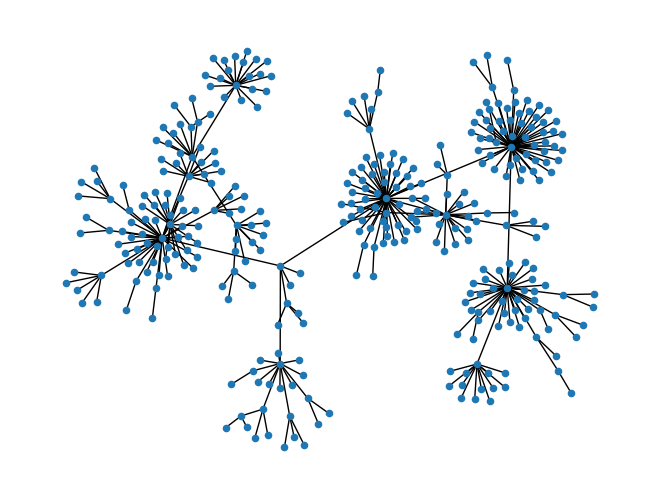

In [34]:
import networkx as nx

subgraph = nx.induced_subgraph(network.graph, network.communities[100])

A_ = nx.to_scipy_sparse_array(
    subgraph, nodelist=subgraph.nodes, dtype=int
).tocsr()

print(f"Subgraph of size {subgraph.size()}")
# nx.draw(subgraph)

import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout

pos = graphviz_layout(subgraph, prog="sfdp")  # dot, neato, fdp, sfdp, twopi
nx.draw(subgraph, pos, with_labels=False, node_size=20, font_size=10)
plt.show()


In [3]:
dataset.compute_isolate_candidates_from_network(network)

There are 87878 elements in the dataset which are not present in the network.


In [5]:
nb_connected_components = nx.number_connected_components(network.graph)  #, backend="cugraph"
nb_connected_components

17624

In [5]:
from scipy.sparse import csgraph

A = nx.to_scipy_sparse_array(
    network.graph, nodelist=network.graph.nodes, dtype=float
).tocsr()
L = csgraph.laplacian(A, normed=True)

print(f"Normalized Laplacian matrix L has shape {L.shape} with {L.nnz} non-zero entries.")

Normalized Laplacian matrix L has shape (1727366, 1727366) with 5146954 non-zero entries.


In [6]:
type(L)

scipy.sparse._coo.coo_array

In [ ]:
from cupyx.scipy.sparse.csgraph import connected_components

components = connected_components(L)

In [30]:
import numpy as np

D = L - L.T
D.nnz, np.allclose(D.data, 0)

(16252, True)

In [ ]:
from scipy.sparse.linalg import eigsh

k = 2  # number of eigenvectors
vals, vecs = eigsh(L, k=k, which='LM', tol=1e-6, maxiter=10)

In [39]:
import cupyx.scipy.sparse as cusp
from cupyx.scipy.sparse.linalg import eigsh

L_gpu = cusp.csr_matrix(L)

vals, vecs = eigsh(L_gpu, k=2, which='LM', tol=1e-6, maxiter=1000)
vecs

array([[-7.51713730e-03, -1.62070089e-03],
       [ 7.17042885e-04,  1.35433152e-04],
       [ 5.76652349e-04,  4.13867316e-04],
       ...,
       [ 1.39767702e-05, -6.34658955e-04],
       [-1.24909278e-05, -5.22619029e-05],
       [ 1.37553979e-04, -2.73080792e-04]], shape=(1727366, 2))

Perfect. You already have the sparse adjacency `A`. Here's a concrete, practical path.

---

### 1. Construct the Laplacian

For an unnormalized Laplacian:

```python
from scipy.sparse import csgraph

L = csgraph.laplacian(A, normed=False)  # shape (2_000_000, 2_000_000)
```

For a normalized Laplacian:

```python
L_norm = csgraph.laplacian(A, normed=True)
```

`normed=True` is often better for embeddings.

---

### 2. Solve for the first k eigenpairs

#### CPU + SciPy (sparse, symmetric)

```python
from scipy.sparse.linalg import eigsh

k = 20  # number of eigenvectors
# 'SM' = smallest magnitude eigenvalues
vals, vecs = eigsh(L_norm, k=k, which='SM')
```

**Notes**:

* `eigsh` uses ARPACK internally.
* For large graphs, `k` should be small (<=100).
* `L_norm` must be symmetric (it is).
* Runtime ~ O(iterations * edges).

Optional speedup: precondition with LOBPCG.

```python
from scipy.sparse.linalg import lobpcg
import numpy as np

X = np.random.rand(L.shape[0], k)  # initial guess
vals, vecs = lobpcg(L_norm, X)
```

With `pyamg` you can add a multigrid preconditioner:

```python
import pyamg
ml = pyamg.ruge_stuben_solver(L_norm)
M = ml.aspreconditioner()
vals, vecs = lobpcg(L_norm, X, M=M)
```

---

### 3. GPU options

If you want CUDA:

* **cuSolver/cuSparse** via `cupy` or `cugraph`.
* Example with CuPy:

```python
import cupy as cp
import cupyx.scipy.sparse as cusparse
from cupyx.scipy.sparse.linalg import eigsh

A_gpu = cusparse.csr_matrix(A)
L_gpu = cusparse.csgraph.laplacian(A_gpu, normed=True)

vals, vecs = eigsh(L_gpu, k=20, which='SM')
```

**Notes**:

* GPU memory must hold the sparse Laplacian + Krylov basis.
* Works well for k up to a few dozen on typical GPUs.

---

### Recommendation

* **Exact CPU, moderate k**: `eigsh` or `lobpcg + pyamg`.
* **GPU speedup**: `cupyx.scipy.sparse.linalg.eigsh`.
* **Approximate, huge graphs**: Nyström or randomized methods (scikit-learn `TruncatedSVD` on normalized adjacency).

---

If you want, I can write a **ready-to-run pipeline for 2M nodes** that chooses CPU or GPU depending on memory and computes the first k eigenvectors efficiently. It will include preconditioning for LOBPCG. Do you want me to do that?


In [ ]:
result = nx.betweenness_centrality(network.graph, k=10)